In [1]:
import pandas as pd
import numpy as np

date_data = pd.read_csv("D:\Datasets\Dry_Bean_Dataset\Dry_Bean_Dataset.csv") 
date_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
date_data.Area.describe()

count     13611.000000
mean      53048.284549
std       29324.095717
min       20420.000000
25%       36328.000000
50%       44652.000000
75%       61332.000000
max      254616.000000
Name: Area, dtype: float64

In [4]:
date_data["Class"] = date_data["Class"].astype('category')
date_data.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
EquivDiameter       float64
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeFactor4        float64
Class              category
dtype: object

In [5]:
date_data["Class"] = date_data["Class"].cat.codes
date_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [6]:
date_data.duplicated().sum()

68

In [7]:
x=date_data.iloc[:, :-1]
y=date_data.iloc[:, -1]
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int8

In [8]:
date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int8   
dtypes: float64(1

<AxesSubplot:xlabel='Class', ylabel='count'>

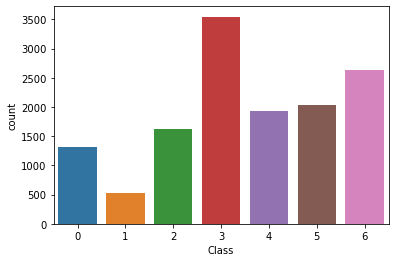

In [10]:
#plot for class values-date fruit dataset has 7 class values as plotted below
import seaborn as sns
sns.countplot(x=date_data['Class'])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [12]:
#preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
from sklearn.metrics import mean_squared_error
from math import sqrt

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
pred

array([3, 3, 3, ..., 5, 0, 3], dtype=int8)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
acc=accuracy_score(y_test,pred)
print("Accuracy is")
print(acc)
print("Confusion Matrix")
cm=confusion_matrix(y_test,pred)
print(cm)
cr=classification_report(y_test,pred)
print("classification report:")
print(cr)

Accuracy is
0.8968049944913699
Confusion Matrix
[[201   0  36   0   2   2  14]
 [  0  92   0   0   0   0   0]
 [ 32   0 311   0   5   1   1]
 [  0   0   0 656   3  16  60]
 [  0   0   8   2 374   0   6]
 [  2   0   0   2   0 355  17]
 [  4   0   0  44  16   8 453]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       255
           1       1.00      1.00      1.00        92
           2       0.88      0.89      0.88       350
           3       0.93      0.89      0.91       735
           4       0.94      0.96      0.95       390
           5       0.93      0.94      0.94       376
           6       0.82      0.86      0.84       525

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.90      2723
weighted avg       0.90      0.90      0.90      2723



In [16]:
#applying gridsearchcv method to find the suitable parameters
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
 'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=2.848035868435799e-05)


In [17]:
#root mean square error:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error( y_test,pred))

0.9100168889402246

In [18]:
pred_i = nbModel_grid.predict(X_test)
print(pred_i)

[3 3 3 ... 5 0 3]


In [19]:
#now again doing classfication report for the best model:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred_i))
print(accuracy_score(y_test,pred_i))
print(confusion_matrix(y_test,pred_i))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       255
           1       1.00      1.00      1.00        92
           2       0.88      0.89      0.88       350
           3       0.93      0.89      0.91       735
           4       0.94      0.96      0.95       390
           5       0.93      0.94      0.94       376
           6       0.82      0.86      0.84       525

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.90      2723
weighted avg       0.90      0.90      0.90      2723

0.8968049944913699
[[201   0  36   0   2   2  14]
 [  0  92   0   0   0   0   0]
 [ 32   0 311   0   5   1   1]
 [  0   0   0 656   3  16  60]
 [  0   0   8   2 374   0   6]
 [  2   0   0   2   0 355  17]
 [  4   0   0  44  16   8 453]]
